In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime

Mounted at /content/drive


In [2]:
log=pd.read_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/log_data.csv')

In [3]:
df_최종no = pd.read_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청x클러.csv',index_col=0)

In [4]:
df_최종no

,desired_amount,main_cluster,credit_score,working month,sub_cluster,purpose,personal_rehab,yearly_income,app_count,apply_count,loanlimit_mean,rate_mean,labels
user_id,,,,,,,,,,,,,
9,1.500000e+07,None,810.000000,4.00,None,BUSINESS,unknown,2.900000e+07,28.769231,0.0,2.073077e+07,11.976923,0
25,5.333333e+07,Cluster 5,536.666667,11.00,Cluster 7,BUSINESS,unknown,3.266667e+07,24.000000,0.0,2.000000e+06,16.600000,0
33,1.800000e+08,None,800.000000,112.00,None,SWITCHLOAN,unknown,5.200000e+07,32.709064,0.0,1.284357e+07,12.620468,0
49,3.000000e+07,Cluster 5,855.000000,36.00,Cluster 7,LIVING,D,3.000000e+07,32.759783,0.0,2.749432e+07,11.707781,0
59,7.800000e+07,None,640.000000,100.00,Cluster 7,SWITCHLOAN,unknown,4.000000e+07,31.352941,0.0,1.876471e+07,12.382353,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879659,2.000000e+08,Cluster 5,990.000000,19.50,Cluster 7,ETC,unknown,7.800000e+07,32.905966,0.0,4.594602e+07,10.660653,0
879660,8.000000e+07,Cluster 5,860.000000,101.00,Cluster 7,ETC,D,2.800000e+08,31.473684,0.0,4.810526e+07,13.178947,0
879665,4.000000e+07,Cluster 5,660.000000,10.00,Cluster 7,SWITCHLOAN,unknown,4.000000e+07,31.382353,0.0,1.676471e+07,16.650000,0


In [5]:
#radar 차트를 만들기 위한 minmax스케일링
from sklearn.preprocessing import MinMaxScaler
df_최종no.loc[:,['yearly_income','desired_amount','loanlimit_mean','working month']] = np.log1p(df_최종no.loc[:,['yearly_income','desired_amount','loanlimit_mean','working month']])
scaler = MinMaxScaler()
scaler.fit(df_최종no.iloc[:,[0,2,3,7,8,9,10,11]])
df_최종no.iloc[:,[0,2,3,7,8,9,10,11]]=scaler.transform(df_최종no.iloc[:,[0,2,3,7,8,9,10,11]])
df_최종no.describe

<bound method NDFrame.describe of          desired_amount main_cluster  credit_score  working month sub_cluster  \
user_id                                                                         
9              0.717609         None      0.718066       0.220806        None   
25             0.772700    Cluster 5      0.456371       0.340915   Cluster 7   
33             0.825527         None      0.708491       0.648571        None   
49             0.747712    Cluster 5      0.761150       0.495398   Cluster 7   
59             0.789209         None      0.555304       0.633169   Cluster 7   
...                 ...          ...           ...            ...         ...   
879659         0.830103    Cluster 5      0.890401       0.414385   Cluster 7   
879660         0.790309    Cluster 5      0.765937       0.634520   Cluster 7   
879665         0.760206    Cluster 5      0.574453       0.328978   Cluster 7   
879688         0.747712         None      0.537658       0.000000        No

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

## **연속형 변수**

In [7]:
df_mean=df_최종no.groupby('labels').mean()

In [8]:
apply_count=df_mean.pop('apply_count')

In [9]:
df = df_mean.copy()

In [10]:
df['cluster_name']=df.index
df.index = range(4)
df.columns

Index(['desired_amount', 'credit_score', 'working month', 'yearly_income',
       'app_count', 'loanlimit_mean', 'rate_mean', 'cluster_name'],
      dtype='object')

In [11]:
df=df[['cluster_name','desired_amount', 'credit_score', 'working month', 'yearly_income',
       'app_count', 'loanlimit_mean', 'rate_mean']]
df

,cluster_name,desired_amount,credit_score,working month,yearly_income,app_count,loanlimit_mean,rate_mean
0,0,0.734909,0.633473,0.384700,0.739428,0.478534,0.739850,0.595116
1,1,0.968776,0.720259,0.372909,0.732862,0.461447,0.749220,0.543654
2,2,0.865358,0.766482,0.468992,0.768816,0.491534,0.765403,0.472512
3,3,0.805215,0.676409,0.423939,0.962047,0.423808,0.774406,0.566625


In [12]:
import matplotlib as mpl

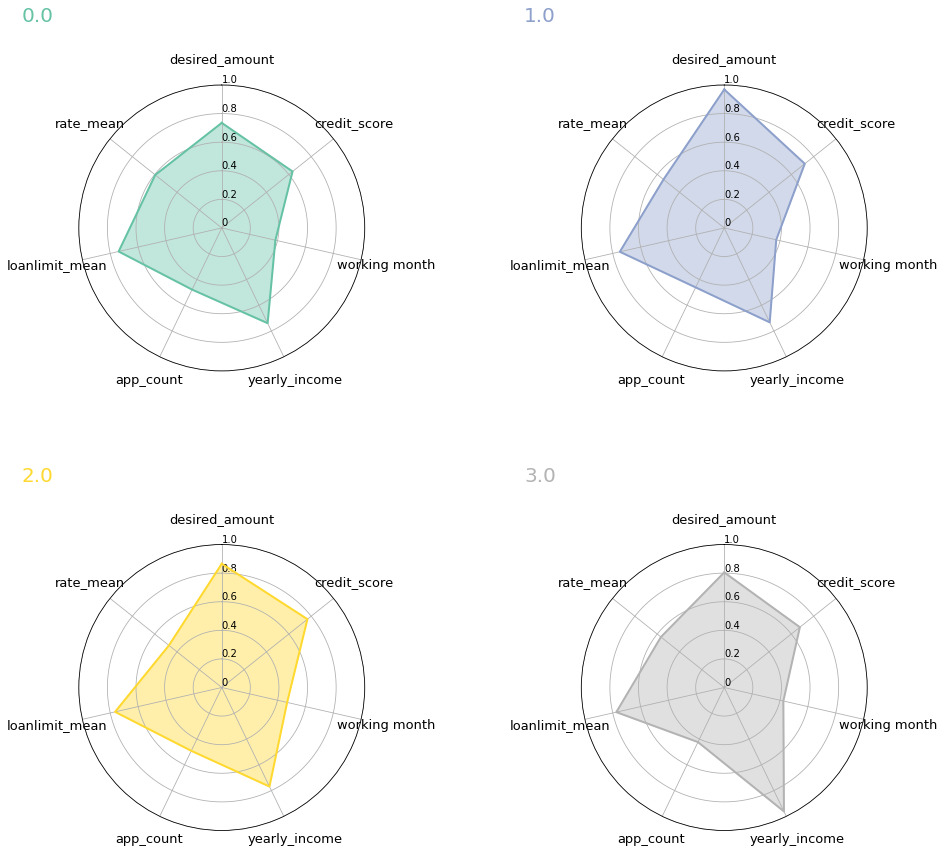

In [77]:
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('cluster_name').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1.0'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.cluster_name, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']=30
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청no-radar.png',dpi=600)

# **범주형 번수**

In [14]:
df_최종no

,desired_amount,main_cluster,credit_score,working month,sub_cluster,purpose,personal_rehab,yearly_income,app_count,apply_count,loanlimit_mean,rate_mean,labels
user_id,,,,,,,,,,,,,
9,0.717609,None,0.718066,0.220806,None,BUSINESS,unknown,0.746240,0.440781,0.0,0.753987,0.492210,0
25,0.772700,Cluster 5,0.456371,0.340915,Cluster 7,BUSINESS,unknown,0.751410,0.365079,0.0,0.649330,0.784810,0
33,0.825527,None,0.708491,0.648571,None,SWITCHLOAN,unknown,0.771600,0.503318,0.0,0.732559,0.532941,0
49,0.747712,Cluster 5,0.761150,0.495398,Cluster 7,LIVING,D,0.747712,0.504124,0.0,0.766624,0.475176,0
59,0.789209,None,0.555304,0.633169,Cluster 7,SWITCHLOAN,unknown,0.760206,0.481793,0.0,0.749528,0.517870,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879659,0.830103,Cluster 5,0.890401,0.414385,Cluster 7,ETC,unknown,0.789209,0.506444,0.0,0.789605,0.408902,0
879660,0.790309,Cluster 5,0.765937,0.634520,Cluster 7,ETC,D,0.844716,0.483709,0.0,0.791660,0.568288,0
879665,0.760206,Cluster 5,0.574453,0.328978,Cluster 7,SWITCHLOAN,unknown,0.760206,0.482260,0.0,0.744484,0.787975,0


In [15]:
obj=df_최종no.iloc[:,[1,4,5,6,12]]

In [16]:
obj

,main_cluster,sub_cluster,purpose,personal_rehab,labels
user_id,,,,,
9,None,None,BUSINESS,unknown,0
25,Cluster 5,Cluster 7,BUSINESS,unknown,0
33,None,None,SWITCHLOAN,unknown,0
49,Cluster 5,Cluster 7,LIVING,D,0
59,None,Cluster 7,SWITCHLOAN,unknown,0
...,...,...,...,...,...
879659,Cluster 5,Cluster 7,ETC,unknown,0
879660,Cluster 5,Cluster 7,ETC,D,0
879665,Cluster 5,Cluster 7,SWITCHLOAN,unknown,0


In [79]:
mclu_obj=obj.groupby(['labels','main_cluster']).count()['purpose']
mclu_obj.groupby('labels').sum()

labels
0    116443
1       148
2      4109
3        47
Name: purpose, dtype: int64

In [80]:
mpl.rcParams['font.size']=13

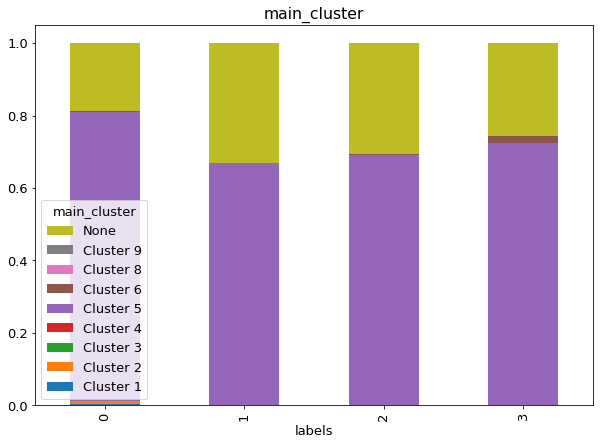

In [81]:
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('main_cluster')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청no-main시계열.png',dpi=600)

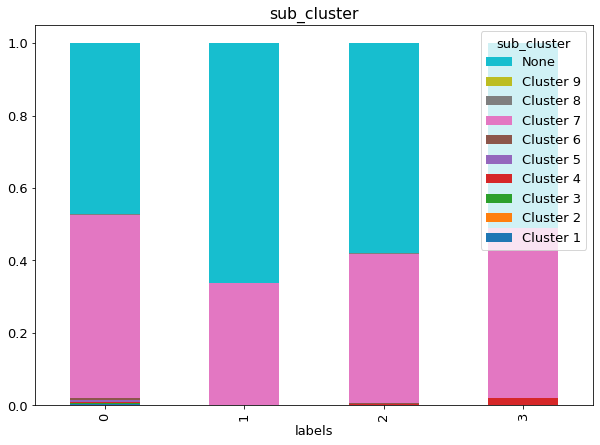

In [82]:
mclu_obj=obj.groupby(['labels','sub_cluster']).count()['purpose']
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('sub_cluster')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청no-sub시계열.png',dpi=600)

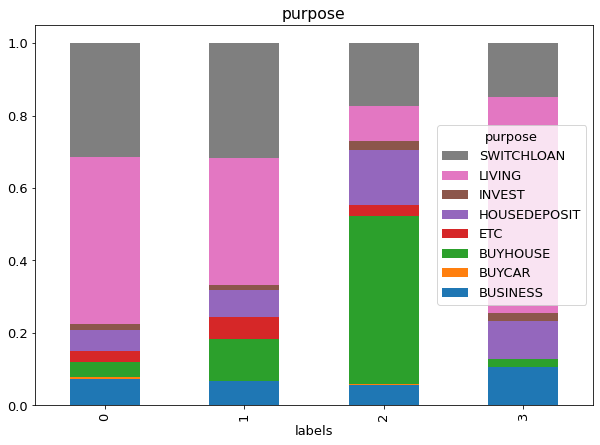

In [83]:
mclu_obj=obj.groupby(['labels','purpose']).count()['main_cluster']
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('purpose')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청no-purpose.png',dpi=600)

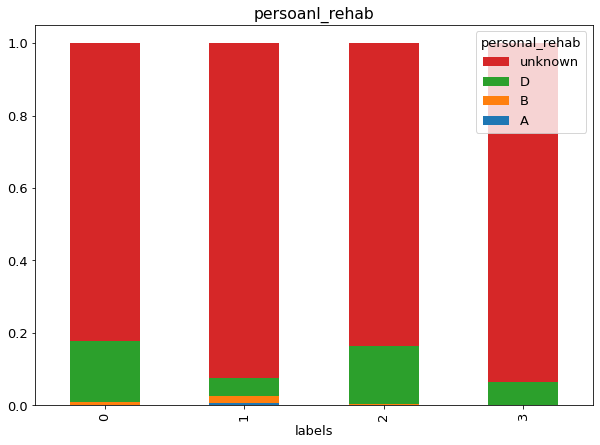

In [84]:
mclu_obj=obj.groupby(['labels','personal_rehab']).count()['main_cluster']
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('persoanl_rehab')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청no-personal_rehab.png',dpi=600)

## **프로세스 마이닝**

In [53]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from pm4py.objects.conversion.log import converter as log_converter

In [55]:
최종no_id_0= df_최종no[df_최종no['labels']==0].index
최종no_id_1= df_최종no[df_최종no['labels']==1].index
최종no_id_2= df_최종no[df_최종no['labels']==2].index
최종no_id_3= df_최종no[df_최종no['labels']==3].index

In [56]:
최종no_0_log=log[log['user_id'].isin(최종no_id_0)]
최종no_1_log=log[log['user_id'].isin(최종no_id_1)]
최종no_2_log=log[log['user_id'].isin(최종no_id_2)]
최종no_3_log=log[log['user_id'].isin(최종no_id_3)]

In [57]:
최종no_0_log.loc[:,'timestamp'] = pd.to_datetime(최종no_0_log['timestamp'])
최종no_1_log.loc[:,'timestamp'] = pd.to_datetime(최종no_1_log['timestamp'])
최종no_2_log.loc[:,'timestamp'] = pd.to_datetime(최종no_2_log['timestamp'])
최종no_3_log.loc[:,'timestamp'] = pd.to_datetime(최종no_3_log['timestamp'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [58]:
data=최종no_0_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)

In [59]:
from pm4py.objects.conversion.log.converter import to_data_frame
data = to_data_frame.apply(event_log)
data

,time:timestamp,concept:name,case:concept:name
0,2022-03-25 11:44:34,OpenApp,814215
1,2022-03-25 11:44:38,Login,814215
2,2022-03-25 11:44:44,UseLoanManage,814215
3,2022-03-25 11:44:58,UseLoanManage,814215
4,2022-03-25 11:45:10,UseLoanManage,814215
...,...,...,...
3051318,2022-05-27 21:28:22,EndLoanApply,548902
3051319,2022-05-27 06:37:11,StartLoanApply,624447
3051320,2022-05-27 06:37:11,ViewLoanApplyIntro,624447
3051321,2022-05-27 06:37:33,CompleteIDCertification,624447


In [60]:
from pm4py.algo.filtering.pandas.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities

{'OpenApp': 565296,
 'GetCreditInfo': 533992,
 'Login': 418567,
 'EndLoanApply': 405490,
 'ViewLoanApplyIntro': 319429,
 'StartLoanApply': 313130,
 'UseLoanManage': 273398,
 'CompleteIDCertification': 214721,
 'SignUp': 5006,
 'UsePrepayCalc': 1258,
 'UseDSRCalc': 1036}

In [61]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

In [62]:
# 0

In [63]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :500,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :500,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

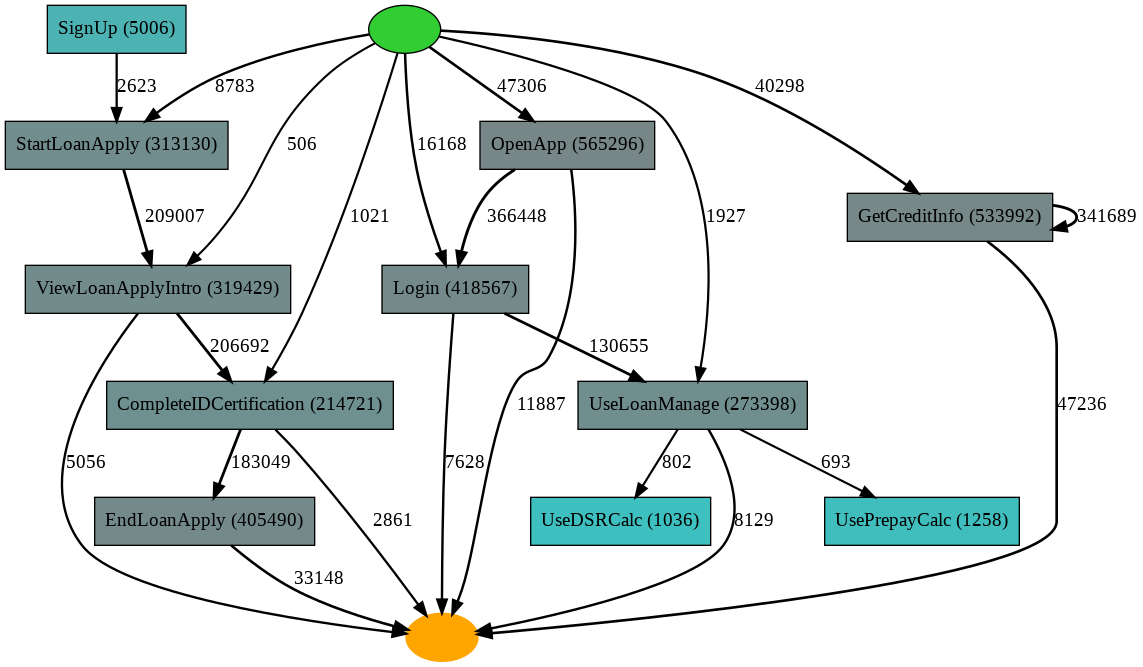

In [64]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)


In [65]:
# 1

In [66]:
data=최종no_1_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
data = to_data_frame.apply(event_log)
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities


{'GetCreditInfo': 404,
 'OpenApp': 391,
 'Login': 324,
 'ViewLoanApplyIntro': 192,
 'EndLoanApply': 188,
 'StartLoanApply': 161,
 'UseLoanManage': 141,
 'CompleteIDCertification': 125,
 'SignUp': 2}

In [67]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

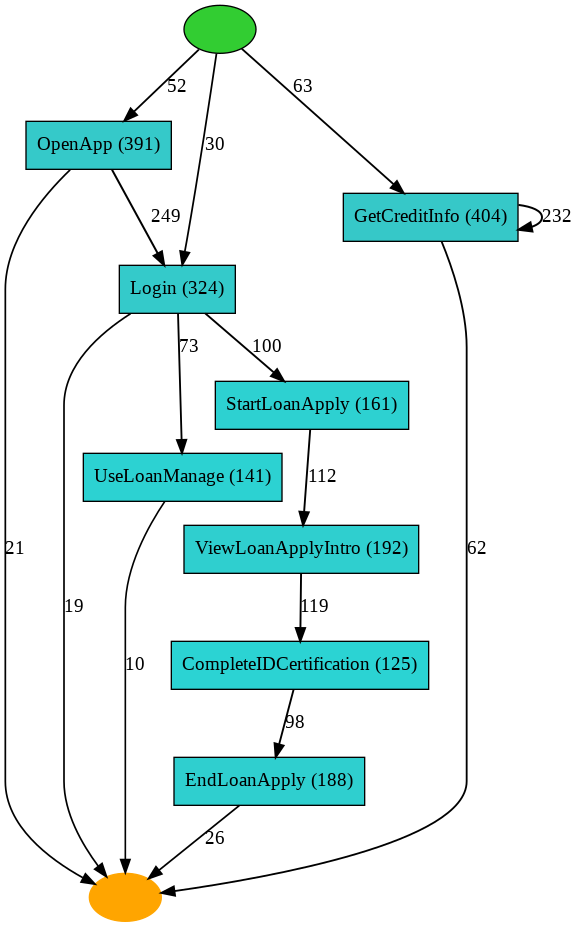

In [68]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [69]:
# 2

In [70]:
data=최종no_2_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
data = to_data_frame.apply(event_log)
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities

{'GetCreditInfo': 11755,
 'OpenApp': 9729,
 'Login': 7075,
 'ViewLoanApplyIntro': 6142,
 'EndLoanApply': 6072,
 'StartLoanApply': 5586,
 'UseLoanManage': 4952,
 'CompleteIDCertification': 3835,
 'UseDSRCalc': 112,
 'SignUp': 64,
 'UsePrepayCalc': 52}

In [71]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :100,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

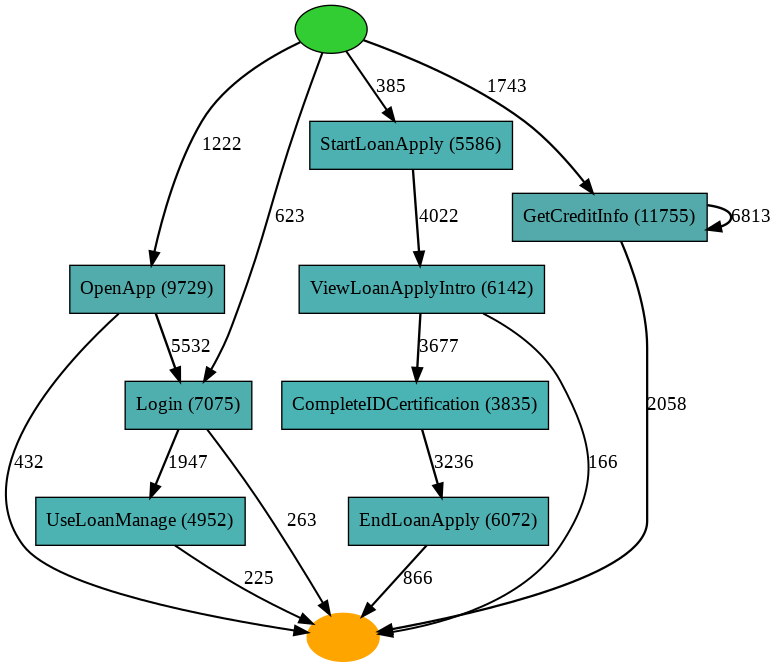

In [72]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [73]:
# 3

In [74]:
data=최종no_3_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
data = to_data_frame.apply(event_log)
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities

{'OpenApp': 197,
 'GetCreditInfo': 162,
 'Login': 136,
 'EndLoanApply': 108,
 'StartLoanApply': 90,
 'ViewLoanApplyIntro': 89,
 'UseLoanManage': 78,
 'CompleteIDCertification': 57,
 'SignUp': 5,
 'UsePrepayCalc': 4,
 'UseDSRCalc': 3}

In [75]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :1,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :10,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

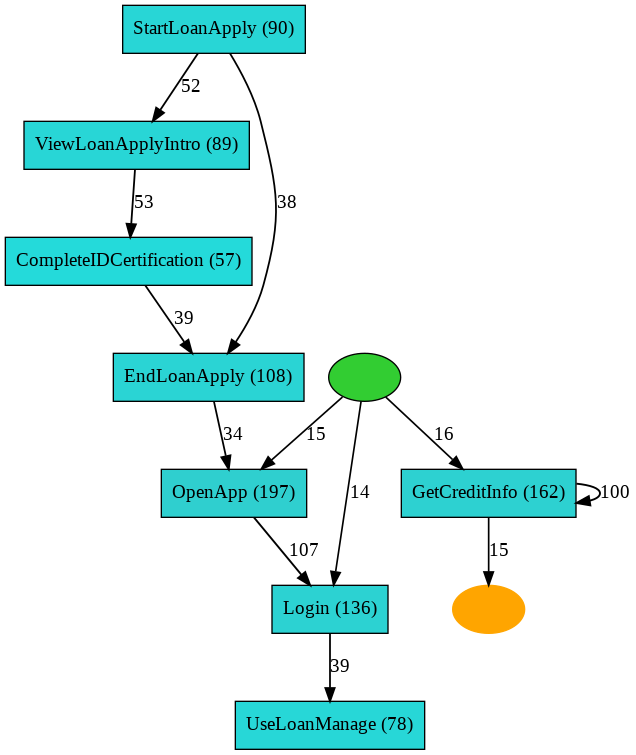

In [76]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)